In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
inventory = pd.read_csv(r'C:/Users/User/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/TradeInventories.csv',index_col='Date',parse_dates=True)


<AxesSubplot:xlabel='Date'>

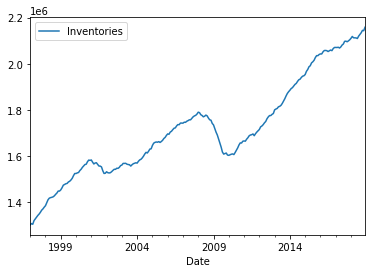

In [4]:
inventory.plot()

In [5]:
#model is somehow seasonal

In [6]:
inventory.columns

Index(['Inventories'], dtype='object')

In [7]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    result = adfuller(dataset.dropna(), autolag ='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    if result[1]<0.05:
        print(out['p-value'])
        print("data is stationary")
        print("reject Null Hypothesis")
        print("It has no unit root")
    else:
        print(out['p-value'])
        print("data is stationary")
        print("rejetc Null Hypothesis")
        print("It has no unit root")
    

In [8]:
adf_test(inventory['Inventories'])

ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
0.950651530229898
data is stationary
rejetc Null Hypothesis
It has no unit root


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
result = seasonal_decompose(inventory['Inventories'],model='additive')


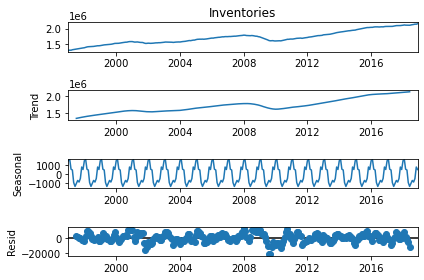

In [11]:
result.plot();

In [12]:
# in the above case 'Seasonal' component does not contribute significantly as it is in between -1000 to 1000 as comapred to
#20,000000 to 20,000000

In [13]:
from pmdarima import auto_arima 
auto_arima(inventory['Inventories'],seasonal=False).summary()
#p=0,q=0,d=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 27 Jan 2022   AIC                           5348.037
Time:                        06:51:53   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
#use ACF and PACF to derive the order of p and q components
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

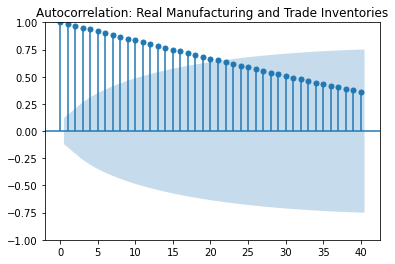

In [15]:
title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(inventory['Inventories'],title=title,lags=lags);

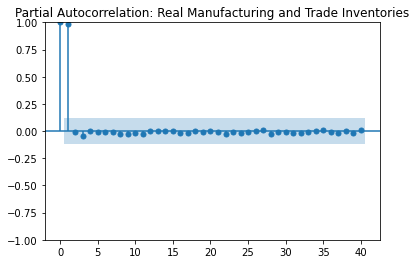

In [16]:
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(inventory['Inventories'],title=title,lags=lags);

In [17]:
#From above plot we can set p=1(AR: PACF plot) and q=1(MA:ACF plot)

In [18]:
from statsmodels.tsa.statespace.tools import diff
#use Augmented Dickey Fuller test to check whether data is stationary or seasonal

In [19]:
inventory['diff_1'] = diff(inventory['Inventories'], k_diff=1)
#differentiate 1 time

In [20]:
adf_test(inventory['diff_1']) 

ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
0.010548311489190486
data is stationary
reject Null Hypothesis
It has no unit root


In [21]:
#lets check ''auto_arima(inventory['Inventories'],seasonal=False).summary()'' by setting p and q values separately as start and end points.


In [22]:
stepwise_fit = auto_arima(inventory['Inventories'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          seasonal=False,
                          trace=True)
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.713 seconds


In [23]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 27 Jan 2022   AIC                           5348.037
Time:                        06:51:54   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Split the data into train/test sets

In [24]:
len(inventory)

264

In [25]:
# Set one year for testing
train = inventory.iloc[:252]
test = inventory.iloc[252:]

In [26]:
train

,Inventories,diff_1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0
...,...,...
2017-08-01,2097163,11650.0
2017-09-01,2097753,590.0
2017-10-01,2095167,-2586.0


# Build the model


In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2555.627
Date:                Thu, 27 Jan 2022   AIC                           5117.254
Time:                        06:51:55   BIC                           5127.830
Sample:                    01-01-1997   HQIC                          5121.510
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    855.681      0.000       0.998       1.002
ma.L1         -0.9999      0.033    -30.428      0.000      -1.064      -0.935
sigma2      2.975e+07   2.14e-10   1.39e+17      0.000    2.98e+07    2.98e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):                98.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.17
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.03e+32. Standard errors may be unstable.
"""

In [29]:
start=len(train)
end=len(train)+len(test)-1
Predictions = results.predict(start=start, end=end,dynamic=False,type='levels').rename('ARIMA(1,1,1) PREDICTIONS')

In [30]:
Predictions

2018-01-01    2.107107e+06
2018-02-01    2.110462e+06
2018-03-01    2.113818e+06
2018-04-01    2.117174e+06
2018-05-01    2.120529e+06
2018-06-01    2.123885e+06
2018-07-01    2.127241e+06
2018-08-01    2.130596e+06
2018-09-01    2.133952e+06
2018-10-01    2.137307e+06
2018-11-01    2.140663e+06
2018-12-01    2.144019e+06
Freq: MS, Name: ARIMA(1,1,1) PREDICTIONS, dtype: float64

<AxesSubplot:xlabel='Date'>

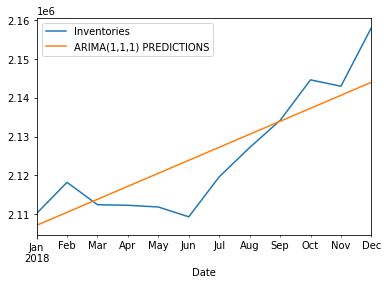

In [31]:
test['Inventories'].plot(legend=True)
Predictions.plot(legend=True)

In [34]:
# Compare predictions to expected values
for i in range(len(Predictions)):
    print(f"predicted={Predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2107106.674, expected=2110158
predicted=2110462.342, expected=2118199
predicted=2113818.004, expected=2112427
predicted=2117173.661, expected=2112276
predicted=2120529.311, expected=2111835
predicted=2123884.956, expected=2109298
predicted=2127240.595, expected=2119618
predicted=2130596.228, expected=2127170
predicted=2133951.855, expected=2134172
predicted=2137307.476, expected=2144639
predicted=2140663.091, expected=2143001
predicted=2144018.701, expected=2158115


# Evaluate the model


In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
error = mean_absolute_error(test['Inventories'], Predictions)
print(error)

6282.71800638681


In [37]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], Predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 7698.879459


In [ ]:
#Forecast into Unknown features

In [39]:
model = sm.tsa.arima.ARIMA(inventory['Inventories'], order=(1,1,1))

In [40]:
results = model.fit()

In [41]:
fcast = results.predict(start=len(inventory), end=len(inventory)+11, typ='levels').rename('ARIMA (1,1,1) Forecast')

<AxesSubplot:xlabel='Date'>

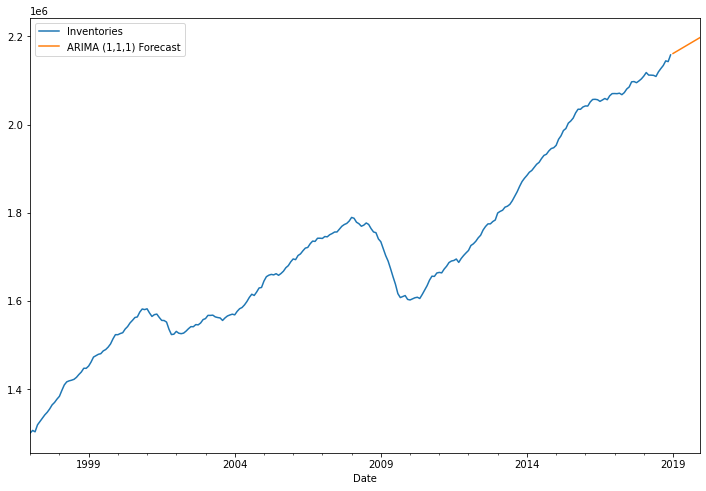

In [42]:
inventory['Inventories'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [ ]:
                                        "END"